# Week 2 - Communication

## Notes

### `dplyr` Package

In [2]:
# Ensuring a clean workspace
rm(list=ls())

# Install the dplyr package
if (!('dplyr' %in% installed.packages())) {
    install.packages('dplyr')
}

# Load packages into the workspace
library('dplyr')
library('gapminder'))
library('repr')

# Load the gapminder data
data(gapminder)
head(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


Filtering using `filter()`:

In [3]:
filter(gapminder, lifeExp<30)

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,28.801,8425333,779.4453
Rwanda,Africa,1992,23.599,7290203,737.0686


Subsetting using `select()`:

In [4]:
head(select(gapminder, country, year, lifeExp))

country,year,lifeExp
Afghanistan,1952,28.801
Afghanistan,1957,30.332
Afghanistan,1962,31.997
Afghanistan,1967,34.020
Afghanistan,1972,36.088
Afghanistan,1977,38.438


Adding new columns to the dataframe using `mutate()`:

In [5]:
head(mutate(gapminder, totalgdp=gdpPercap*pop))

country,continent,year,lifeExp,pop,gdpPercap,totalgdp
Afghanistan,Asia,1952,28.801,8425333,779.4453,6567086330
Afghanistan,Asia,1957,30.332,9240934,820.8530,7585448670
Afghanistan,Asia,1962,31.997,10267083,853.1007,8758855797
Afghanistan,Asia,1967,34.020,11537966,836.1971,9648014150
Afghanistan,Asia,1972,36.088,13079460,739.9811,9678553274
Afghanistan,Asia,1977,38.438,14880372,786.1134,11697659231


Using the pipe `%>%` allows us to perform a series of operations at once:

In [6]:
gapminder %>% filter(lifeExp<30) %>%
    select(country, year, lifeExp)

country,year,lifeExp
Afghanistan,1952,28.801
Rwanda,1992,23.599


### Basic Plots

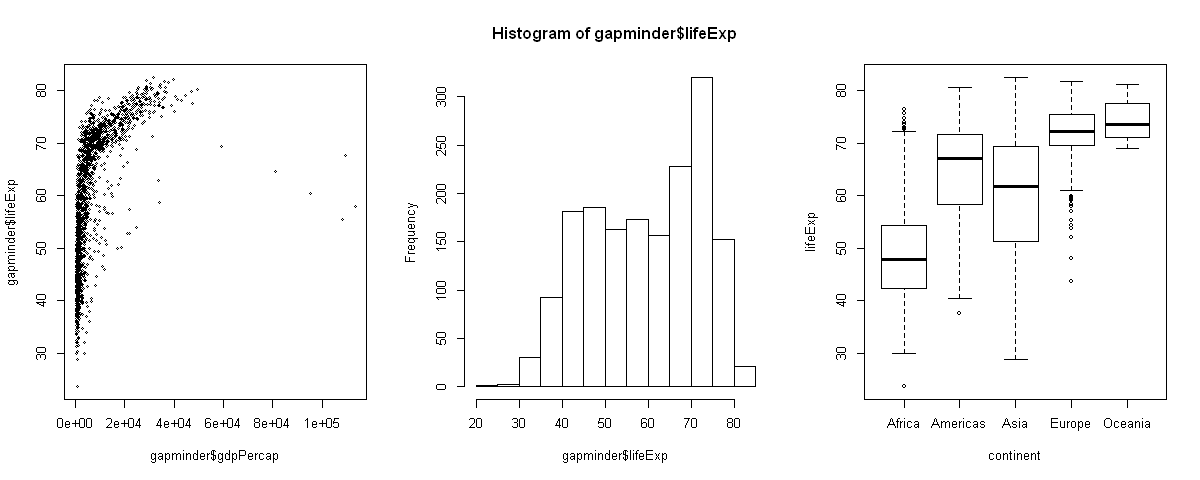

In [7]:
# Options
options(repr.plot.width=10, repr.plot.height=4) # Resizing plot size (default is 7x7)
par(mfrow=c(1,3)) # 1 row, 3 columns

# Plots
plot(gapminder$gdpPercap, gapminder$lifeExp, cex=0.5)
hist(gapminder$lifeExp)
boxplot(lifeExp~continent, data=gapminder)

## Practice Questions

### Question 1

In [8]:
options(digits=3) # Sets all numbers to 3 significant figures

### Question 2

In [9]:
library('babynames')
data(babynames)

Selecting the `year`, `name`, and `proportion` columns:

In [10]:
head(select(babynames, year, name, prop))

year,name,prop
1880,Mary,0.0724
1880,Anna,0.0267
1880,Emma,0.0205
1880,Elizabeth,0.0199
1880,Minnie,0.0179
1880,Margaret,0.0162


Creating a column called `rank`:

In [11]:
rankedNames <- mutate(babynames, rank=rank(-prop))
head(rankedNames)

year,sex,name,n,prop,rank
1880,F,Mary,7065,0.0724,14
1880,F,Anna,2604,0.0267,709
1880,F,Emma,2003,0.0205,1131
1880,F,Elizabeth,1939,0.0199,1192
1880,F,Minnie,1746,0.0179,1427
1880,F,Margaret,1578,0.0162,1683


Creating a `total` column (i.e. the total number of people born by gender each year):

In [12]:
rankedTotalNames <- mutate(babynames, total=n/prop, rank=rank(-babynames$prop))
head(rankedTotalNames)

year,sex,name,n,prop,total,rank
1880,F,Mary,7065,0.0724,97605,14
1880,F,Anna,2604,0.0267,97605,709
1880,F,Emma,2003,0.0205,97605,1131
1880,F,Elizabeth,1939,0.0199,97605,1192
1880,F,Minnie,1746,0.0179,97605,1427
1880,F,Margaret,1578,0.0162,97605,1683


Filter the data frame above to show the top 5 names with the highest proprotion:

In [13]:
topFive <- filter(rankedNames, rank<=5)
topFive[order(topFive$rank),]

year,sex,name,n,prop,rank
1880,M,John,9655,0.0815,1
1881,M,John,8769,0.0810,2
1880,M,William,9532,0.0805,3
1883,M,John,8894,0.0791,4
1881,M,William,8524,0.0787,5


Creating a new data frame with no 1880 year:

In [14]:
no1880 <- filter(babynames, year!=1880)
paste('There are', dim(no1880)[1], 'rows')

[1] "There are 1922665 rows"

Creating a new data frame with just 2016 and 2017:

In [15]:
recent <- filter(babynames, year %in% c(2016, 2017))
paste('There are', dim(recent)[1], 'rows')
head(recent)

[1] "There are 65448 rows"

year,sex,name,n,prop
2016,F,Emma,19471,0.01010
2016,F,Olivia,19327,0.01002
2016,F,Ava,16283,0.00844
2016,F,Sophia,16112,0.00835
2016,F,Isabella,14772,0.00766
2016,F,Mia,14415,0.00747


Creating a new data frame with just 2016 and 2017 females:

In [16]:
recentFemales <- filter(babynames, year %in% c(2016, 2017) & sex=='F')
paste('There are', dim(recentFemales)[1], 'rows')
head(recentFemales)

[1] "There are 37126 rows"

year,sex,name,n,prop
2016,F,Emma,19471,0.01010
2016,F,Olivia,19327,0.01002
2016,F,Ava,16283,0.00844
2016,F,Sophia,16112,0.00835
2016,F,Isabella,14772,0.00766
2016,F,Mia,14415,0.00747


Using the pipe, `%>%`, create a new data frame that:
* Only has years 2016 and 2017
* Has columns for the rank *and* total babies born by gender each year
* Only shows the top 5 baby names

In [17]:
temp <- babynames %>%
    filter(year %in% c(2016, 2017)) %>%
    mutate(rank=rank(-prop)) %>%
    mutate(total=n/prop) %>%
    filter(rank<=5)
head(temp[order(temp$rank),])

year,sex,name,n,prop,rank,total
2017,F,Emma,19738,0.01053,1,1874899
2016,F,Emma,19471,0.01010,2,1928439
2016,F,Olivia,19327,0.01002,3,1928438
2017,F,Olivia,18632,0.00994,4,1874899
2017,M,Liam,18728,0.00954,5,1963290


### Question 3

In [18]:
temp2 <- babynames %>%
    select(year, name, prop) %>%
    mutate(rank=rank(-prop))
head(temp2[order(temp2$rank),])

year,name,prop,rank
1880,John,0.0815,1
1881,John,0.0810,2
1880,William,0.0805,3
1883,John,0.0791,4
1881,William,0.0787,5
1882,John,0.0783,6


### Question 4

In [19]:
# Install the HistData package
if (!('HistData' %in% installed.packages())) {
    install.packages('HistData')
}

# Load the HistData package into the workspace
library('HistData')

# Load the HistData package data
data(GaltonFamilies)
gf <- GaltonFamilies
head(gf)

family,father,mother,midparentHeight,children,childNum,gender,childHeight
001,78.5,67.0,75.4,4,1,male,73.2
001,78.5,67.0,75.4,4,2,female,69.2
001,78.5,67.0,75.4,4,3,female,69.0
001,78.5,67.0,75.4,4,4,female,69.0
002,75.5,66.5,73.7,4,1,male,73.5
002,75.5,66.5,73.7,4,2,male,72.5


Create a scatterplot of the child height to the father height:

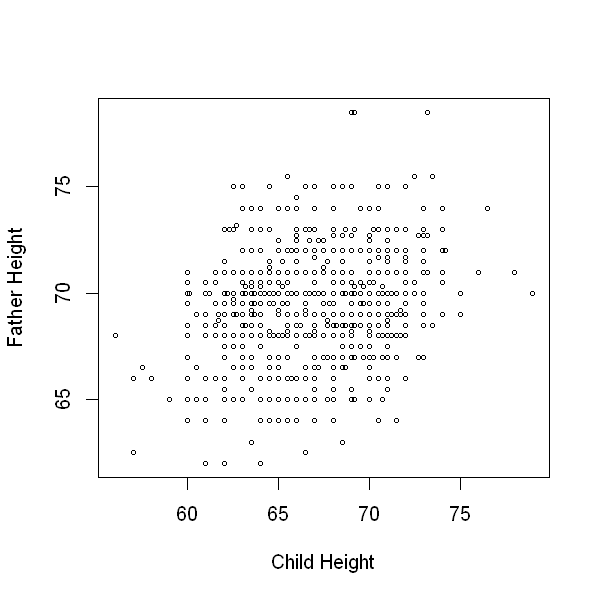

In [20]:
options(repr.plot.width=5, repr.plot.height=5)
plot(gf$childHeight, gf$father, cex=0.5,
    xlab="Child Height", ylab="Father Height")

Create a histogram of the children heights in inches and cm:

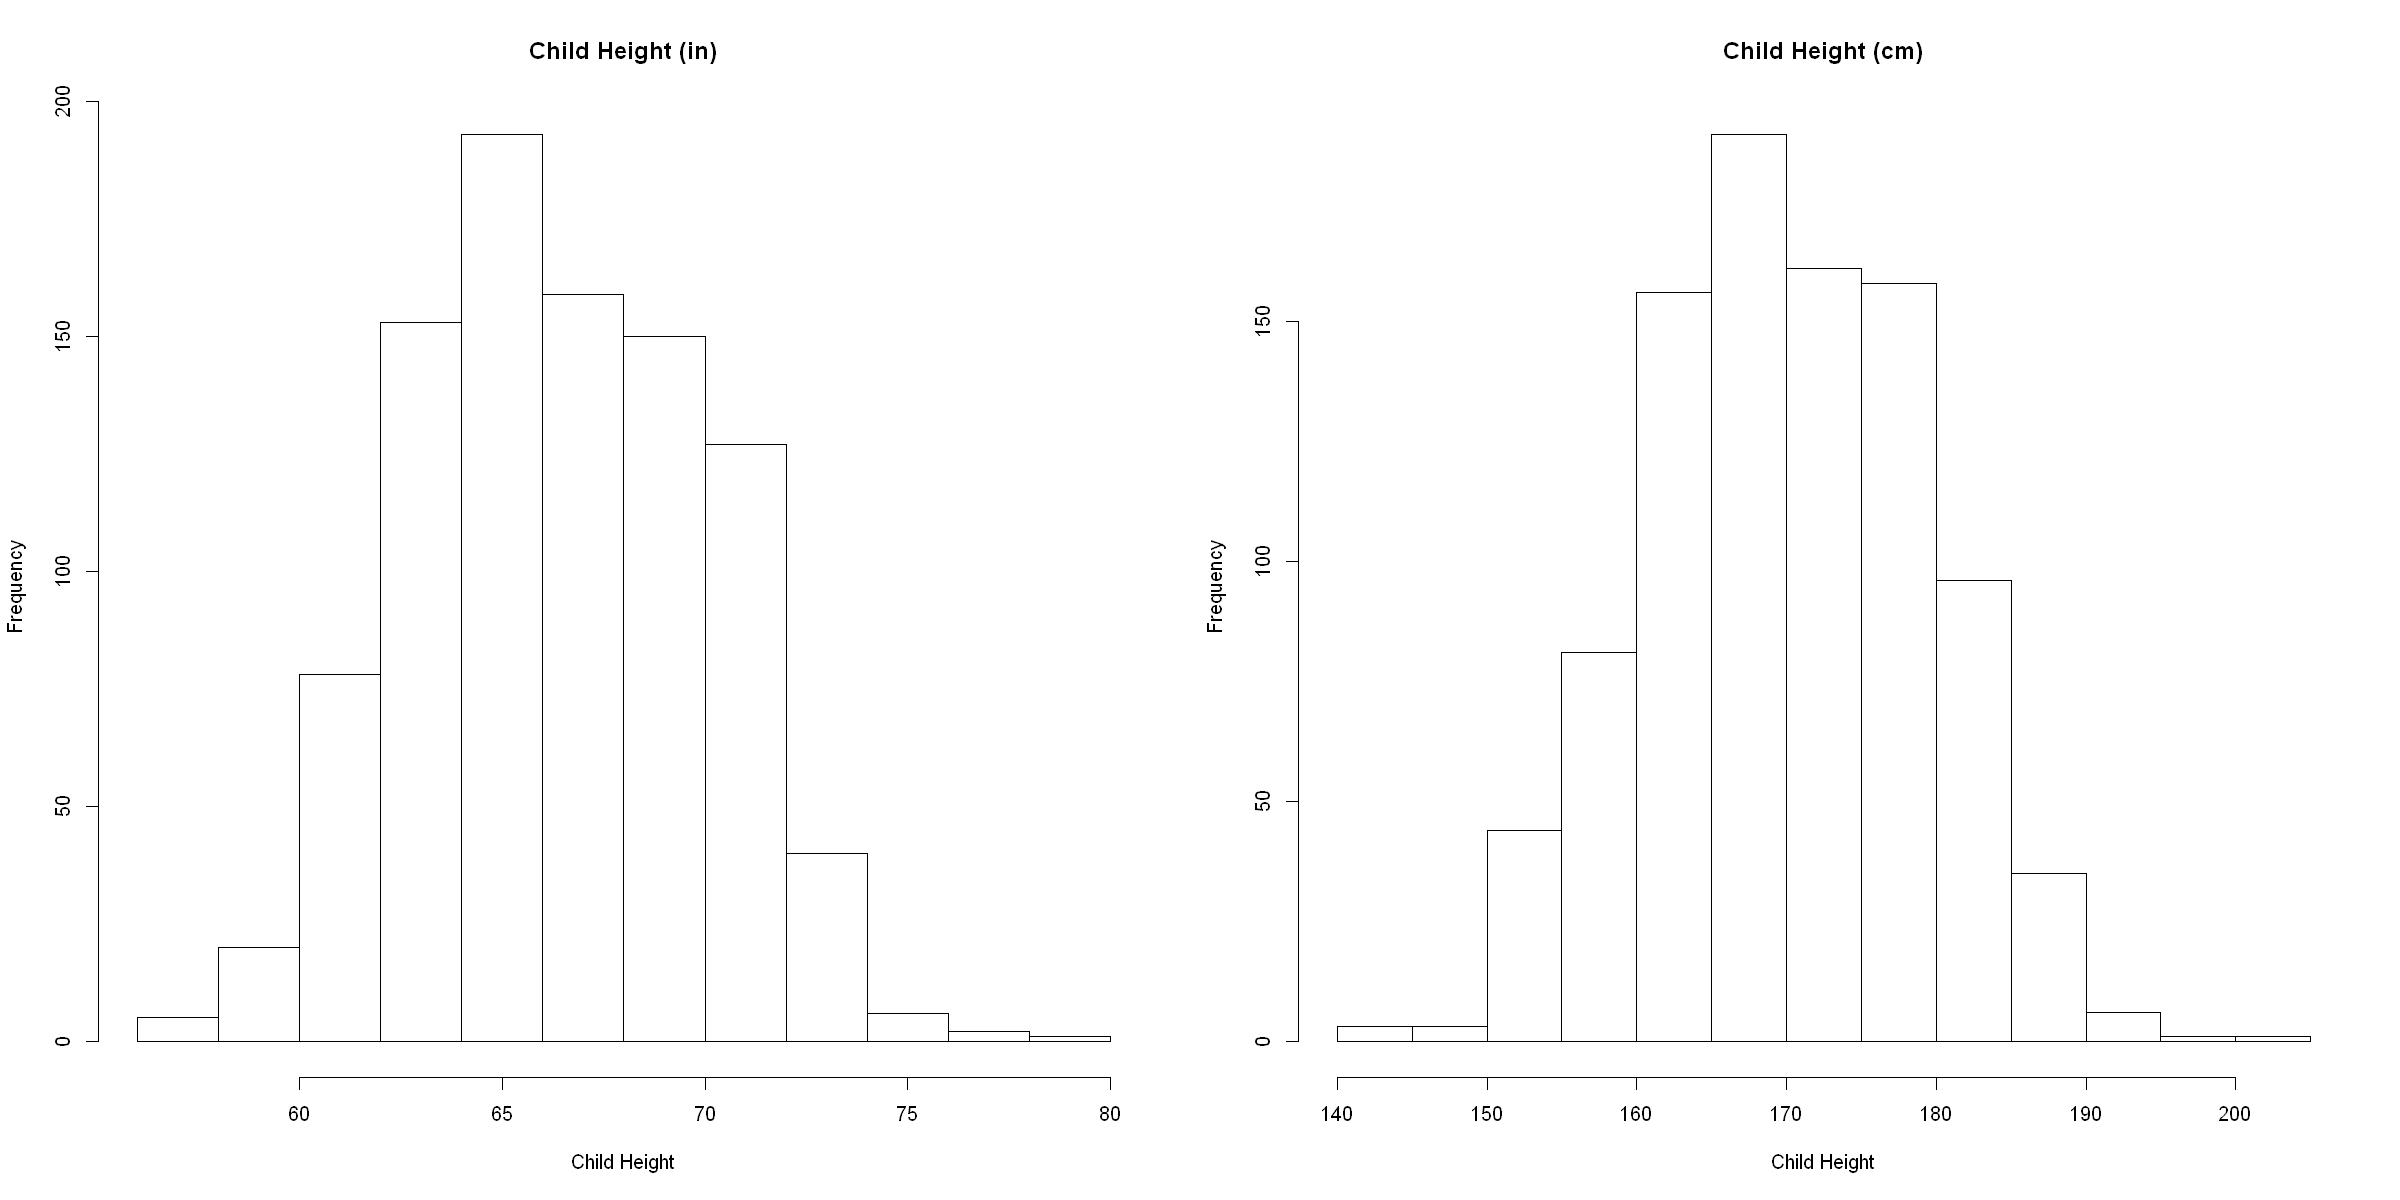

In [21]:
options(repr.plot.width=20, repr.plot.height=10)
par(mfrow=c(1,2))
hist(gf$childHeight, xlab='Child Height', main='Child Height (in)')
hist(gf$childHeight*2.54, xlab='Child Height', main='Child Height (cm)')

Create a boxplot of the children heights in inches and cm by gender:

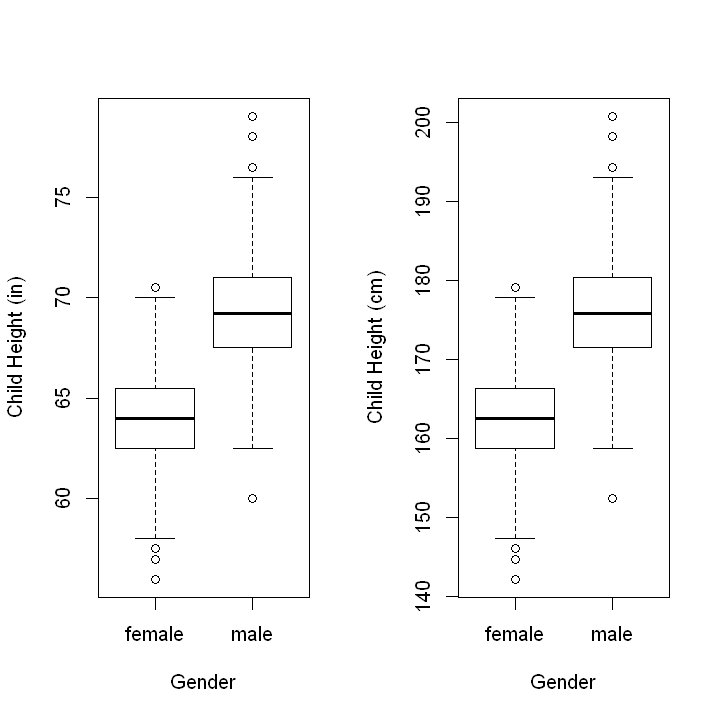

In [22]:
options(repr.plot.width=6, repr.plot.height=6)
par(mfrow=c(1,2))
boxplot(gf$childHeight ~ gf$gender, xlab='Gender', ylab='Child Height (in)')
boxplot(gf$childHeight*2.54 ~ gf$gender, xlab='Gender', ylab='Child Height (cm)')

## Resources

* [Resizing plots in Jupyter](https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html)
* [Side-by-side graphs](https://www.theanalysisfactor.com/r-multiple-graphs/)
* [Exporting a high resolution graph](https://community.rstudio.com/t/can-i-change-default-image-dimensions-for-export-of-plot/62876)